## Introduction

## Loading data

### loading principal package 

In [376]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading original building file : overview all dataset 

In [377]:
df = pd.read_excel('EPC_Public.xlsx', sheetname='no_error')
df.head()

,EPC_ID,Organization_Name,Public_Building_Type,Public_Building_Category,Construction_Year,Refurbishment_Year,Building_Age,Useful_Floor_Area [m2],EPC_Score,Energy_Carrier_Electricity,...,ONDERWIJS_AANTAL_LLN,ONDERWIJS_AANTAL_M2_SPORTHAL,ONDERWIJS_AANTAL_M2_ZWEMBAD,ONDERWIJS_AANTAL_MAALTIJDEN,OPVANG_AANTAL_KINDEREN,RUSTHUIS_AANTAL_BEDDEN,RUSTHUIS_SERVICEFLATS,ZIEKENHUIS_AANTAL_BEDDEN,ZWEMBAD_WATEROPPERVLAKTE,ZWEMBAD_SUBTROPISCH
0,2,Vrije Basisschool VIEJOOL,primary school,eductional buildings,1953,NaN,66,1278.00,165.87,electricity,...,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,BuBaO De Berkjes,primary school,eductional buildings,1997,NaN,22,1088.05,120.70,electricity,...,44.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,Vlerick,higher education and universities,eductional buildings,1920,2005.0,99,11178.00,409.14,electricity,...,5225.0,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN
3,22,Vlerick Leuven,higher education and universities,eductional buildings,1920,2005.0,99,4457.00,392.77,electricity,...,2075.0,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN
4,42,Sint-Jozefsinstituut,secondary school,eductional buildings,1946,2000.0,73,18424.10,123.78,electricity,...,1659.0,948.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN


The variable 'Building_Age','Useful_Floor_Area' and 'EPC_Score' are important to the simulate future. 
so the analysis is mainly around these varaibles. 

Firstly, we want to get the clustering for dataset in each 'public_building_category'
secondly, we want to try also the clustering of dataset in each 'public_building_type' .
and then idealy, we want to construct the model for the public_building_categrory. 


Let's start with extract the useful data

In [378]:
data_use_o = df.loc[:,['EPC_ID','Public_Building_Type','Public_Building_Category','Building_Age','Useful_Floor_Area [m2]','EPC_Score']]
data_use_o.head()


,EPC_ID,Public_Building_Type,Public_Building_Category,Building_Age,Useful_Floor_Area [m2],EPC_Score
0,2,primary school,eductional buildings,66,1278.00,165.87
1,5,primary school,eductional buildings,22,1088.05,120.70
2,21,higher education and universities,eductional buildings,99,11178.00,409.14
3,22,higher education and universities,eductional buildings,99,4457.00,392.77
4,42,secondary school,eductional buildings,73,18424.10,123.78


And overview some basic descriptions about the features in public_building_category and public_building_type. 

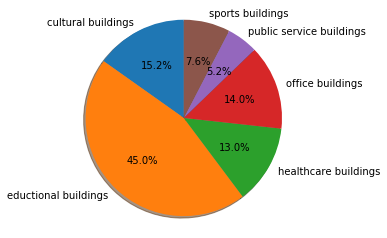

In [689]:
re2 = data_use_o.groupby(['Public_Building_Category']).count()
sizes = re2.loc[:,'EPC_ID']
labels = re2.index.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [695]:
data_use_o.loc[:,['eductional buildings']]

KeyError: "None of [['eductional buildings']] are in the [columns]"

In [ ]:
re = data_use_o.loc['eductional buildings'].groupby(['Public_Building_Type']).count()
sizes = re.loc[:,'EPC_ID']
labels = re.index.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [379]:
# public_building_type
data_use_o.groupby(['Public_Building_Type']).count()

,EPC_ID,Public_Building_Category,Building_Age,Useful_Floor_Area [m2],EPC_Score
Public_Building_Type,,,,,
administrative building,1277,1277,1277,1277,1277
airport building,2,2,2,2,2
cultural or meeting building,1014,1014,1014,1014,1014
daycare and/or after school care,309,309,309,309,309
elderly home,571,571,571,571,571
higher education and universities,169,169,169,169,169
hospital,146,146,146,146,146
justice court,19,19,19,19,19
library,247,247,247,247,247


In [380]:
# public_building_category
data_use_o.groupby(['Public_Building_Category']).count()

,EPC_ID,Public_Building_Type,Building_Age,Useful_Floor_Area [m2],EPC_Score
Public_Building_Category,,,,,
cultural buildings,1390,1390,1390,1390,1390
eductional buildings,4122,4122,4122,4122,4122
healthcare buildings,1192,1192,1192,1192,1192
office buildings,1277,1277,1277,1277,1277
public service buildings,472,472,472,472,472
sports buildings,698,698,698,698,698


In [381]:
data_use_o.loc[data_use_o['Public_Building_Category']=='eductional buildings',:].groupby(['Public_Building_Type']).count()

,EPC_ID,Public_Building_Category,Building_Age,Useful_Floor_Area [m2],EPC_Score
Public_Building_Type,,,,,
daycare and/or after school care,309,309,309,309,309
higher education and universities,169,169,169,169,169
other educational infrastructure,422,422,422,422,422
pre-primary school,370,370,370,370,370
primary school,1996,1996,1996,1996,1996
secondary school,856,856,856,856,856


In [382]:
data_use_o.describe()
data_use_o.describe(include='all').loc['unique', :]

EPC_ID                      NaN
Public_Building_Type         21
Public_Building_Category      6
Building_Age                NaN
Useful_Floor_Area [m2]      NaN
EPC_Score                   NaN
Name: unique, dtype: object

### using 'type' or 'category'  data 

In [622]:
f1 = 'Public_Building_Type' #'Public_Building_Category'
value = 'primary school'
data_selected = data_use_o.loc[data_use_o[f1]== value,['Building_Age','Useful_Floor_Area [m2]','EPC_Score']]
#sports buildings,office buildings,educational buildings,
#cultural buildings,healthcare buildings(4),public service buildings(2)
data_selected.head()

,Building_Age,Useful_Floor_Area [m2],EPC_Score
0,66,1278.00,165.87
1,22,1088.05,120.70
31,59,1785.00,108.26
32,50,1465.00,142.60
43,69,3915.40,163.63


extract the educational buildings data from original category data 

In [624]:
data_selected.count()


Building_Age              1996
Useful_Floor_Area [m2]    1996
EPC_Score                 1996
dtype: int64

### data for model

In [625]:
data_for_model_o = data_selected

let's see the distribution of each variable just for the category education buildings from original data

In [626]:
data_for_model_o.describe()

,Building_Age,Useful_Floor_Area [m2],EPC_Score
count,1996.000000,1996.000000,1996.000000
mean,74.781563,2192.171663,172.312720
std,44.196943,1714.610576,139.197402
min,5.000000,152.000000,10.430000
25%,50.000000,1212.750000,117.812500
50%,65.500000,1811.500000,152.450000
75%,96.000000,2617.500000,198.875000
max,908.000000,20897.000000,4931.710000


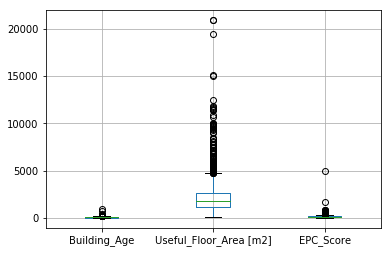

In [627]:
#pd.options.display.mpl_style = 'default'
data_for_model_o.boxplot()
#plt.title("Education building original data")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2dabda90>,
      dtype=object)

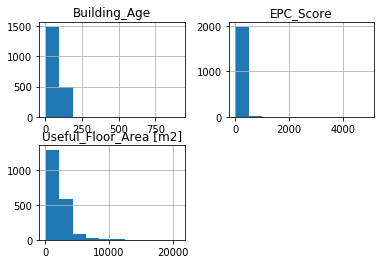

In [628]:
data_for_model_o.hist()

## preprocessing dataset

### standard data processing

In the business world, "normalization" typically means that the range of values are "normalized to be from 0.0 to 1.0".
𝑋𝑐ℎ𝑎𝑛𝑔𝑒𝑑=𝑋−𝑋𝑚𝑖𝑛/𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛

"Standardization" typically means that the range of values are "standardized" to measure how many standard deviations the value is from its mean.
𝑋𝑐ℎ𝑎𝑛𝑔𝑒𝑑=𝑋−𝜇/𝜎

For example, some data mining techniques use the Euclidean distance. Therefore, all parameters should have the same scale for a fair comparison between them.

Two methods are usually well known for rescaling data. Normalization, which scales all numeric variables in the range [0,1]. 
On the other hand, you can use standardization on your data set. It will then transform it to have zero mean and unit variance, for example using the equation below:
Both of these techniques have their drawbacks. If you have outliers in your data set, normalizing your data will certainly scale the “normal” data to a very small interval. And generally, most of data sets have outliers. When using standardization, your new data aren’t bounded (unlike normalization).

#### standardization dataset 

In library sklearn of python, there are two methods that is usually used in rescaling for 'standardization'data:
<br> *preprocessing.sclae，is just a function which transforms some data
<br> *preprocessing.StandardScaler().fit_transform，is a class supporting the Transformer API

let's begining with the comparaison of these two methods. 

##### preprocessing.scale() for standardizing the dataset

overview the result of rescaling dataset by the preprocessing.scale() method

In [629]:
# call the method preprocessing.scale() for standardizing the dataset
from sklearn import preprocessing
data_for_model_norm = pd.DataFrame(preprocessing.scale(data_for_model_o))
#data_o_category_edu_norm = (data_o_category_edu - data_o_category_edu.min()) / (data_o_category_edu.max() - data_o_category_edu.min())
data_for_model_norm.columns = data_for_model_o.columns  + '_norm'
data_for_model_norm.head()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
0,-0.198741,-0.533299,-0.046296
1,-1.194535,-0.644110,-0.370881
2,-0.357163,-0.237531,-0.460273
3,-0.560848,-0.424209,-0.213511
4,-0.130846,1.005278,-0.062393


In [630]:
data_for_model_norm.describe()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
count,1.996000e+03,1.996000e+03,1.996000e+03
mean,4.177242e-17,-3.255301e-16,-8.212647e-17
std,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.579273e+00,-1.190173e+00,-1.163264e+00
25%,-5.608481e-01,-5.713642e-01,-3.916300e-01
50%,-2.100573e-01,-2.220720e-01,-1.427304e-01
75%,4.802086e-01,2.481234e-01,1.908724e-01
max,1.885712e+01,1.091182e+01,3.420028e+01


##### preprocessing.StandardScaler() for standardizing the dataset

overview the result of rescaling dataset by the preprocessing.StandardScaler() method

In [631]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
data_for_model_norm2 = pd.DataFrame(StandardScaler().fit_transform(data_for_model_o.values))
data_for_model_norm2.columns = data_for_model_o.columns  + '_norm2'
data_for_model_norm2.head()

,Building_Age_norm2,Useful_Floor_Area [m2]_norm2,EPC_Score_norm2
0,-0.198741,-0.533299,-0.046296
1,-1.194535,-0.644110,-0.370881
2,-0.357163,-0.237531,-0.460273
3,-0.560848,-0.424209,-0.213511
4,-0.130846,1.005278,-0.062393


In [632]:
data_for_model_norm.describe()

,Building_Age_norm,Useful_Floor_Area [m2]_norm,EPC_Score_norm
count,1.996000e+03,1.996000e+03,1.996000e+03
mean,4.177242e-17,-3.255301e-16,-8.212647e-17
std,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.579273e+00,-1.190173e+00,-1.163264e+00
25%,-5.608481e-01,-5.713642e-01,-3.916300e-01
50%,-2.100573e-01,-2.220720e-01,-1.427304e-01
75%,4.802086e-01,2.481234e-01,1.908724e-01
max,1.885712e+01,1.091182e+01,3.420028e+01


we can observe that the rescaling results from two standardization methods are same. so we use the latter, even if i would not need inverse_transform and co. supported by StandardScaler().

Excerpt from the docs:
The function scale provides a quick and easy way to perform this operation on a single array-like dataset

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline

#### normalization dataset 

Also the sklearn processing gives us a function MaxAbsScaler() to realize the normalization 

In [633]:
max_abs_scaler = preprocessing.MaxAbsScaler()
data_for_model_norm3 = pd.DataFrame(max_abs_scaler.fit_transform(data_for_model_o))
data_for_model_norm3.columns = data_for_model_o.columns  + '_norm3'
data_for_model_norm3.head()

,Building_Age_norm3,Useful_Floor_Area [m2]_norm3,EPC_Score_norm3
0,0.072687,0.061157,0.033633
1,0.024229,0.052067,0.024474
2,0.064978,0.085419,0.021952
3,0.055066,0.070106,0.028915
4,0.075991,0.187367,0.033179


#### comparison the outlier of original data and rescaling data 

This step will verify the distribution of before and after preprocessing change or not. if the distribution of dataset have not been changed, we can delete firstly the outlier and then rescaling the data. the result of rescaling data will be better comapring with the dataset with the ouliers.

The figures of boxplot and distribution for the origianl data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25417b00>,
      dtype=object)

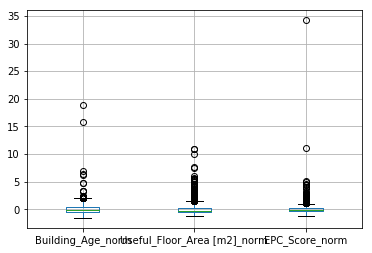

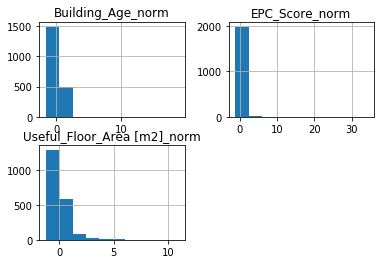

In [634]:
data_for_model_norm.boxplot()
#plt.title("Education building standard data")
data_for_model_norm.hist()

Text(0.5,0.98,'Comparing distribution of building_age')

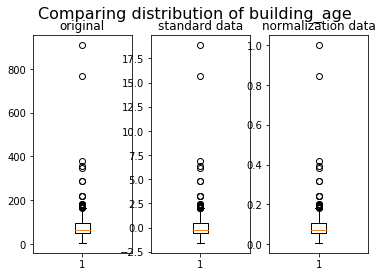

In [635]:
age1 = data_for_model_o.iloc[:,0]
age2 = data_for_model_norm2.iloc[:,0]
age3 = data_for_model_norm3.iloc[:,0]

fig, axs = plt.subplots(1, 3)
axs[0].boxplot(age1)
axs[0].set_title('original')
axs[1].boxplot(age2)
axs[1].set_title('standard data')
axs[2].boxplot(age3)
axs[2].set_title('normalization data')
fig.suptitle('Comparing distribution of building_age', fontsize=16)


we can find drectly the values in before and after boxplot are the same distribution. so let's processing the outlier values based on the boxplot.

#### what's boxplot?

we can find drectly the values in before and after boxplot are the same distribution. 
so let's processing the outlier values based on the boxplot. 

what's boxplot? 
boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean.

interquartile range (IQR):is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles,or between upper and lower quartiles. IQR = Q3 −  Q1
lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile 
Q1-1.5IQR
Q1 = %25
Q3 = %75
Q3 + 1.5*IQR


###  remove outlier and rescaling dataset

using the value percentile and boxplot to remove the outlier data

In [636]:
Q1_Q3 = data_for_model_o.quantile([0.25,0.75]).as_matrix()
Q1 = Q1_Q3[0]
Q3 = Q1_Q3[1]

IQR = Q3 - Q1
outlier_Q1 = Q1 - 1.5*IQR
outlier_Q3 = Q3 + 1.5*IQR

In [637]:
#outlier for 3 index 
outlier = (data_for_model_o['Useful_Floor_Area [m2]']<outlier_Q1[1])|(data_for_model_o['Useful_Floor_Area [m2]']>outlier_Q3[1])|(data_for_model_o['EPC_Score']>outlier_Q3[2])|(data_for_model_o['EPC_Score']<outlier_Q1[2])|(data_for_model_o['Building_Age']<outlier_Q1[0])|(data_for_model_o['Building_Age']>outlier_Q3[0])
outlier_index = data_for_model_o[outlier].index

#outlier for 2 index
#outlier = (data_for_model_o['EPC_Score']>outlier_Q3[1])|(data_for_model_o['EPC_Score']<outlier_Q1[1])|(data_for_model_o['Building_Age']<outlier_Q1[0])|(data_for_model_o['Building_Age']>outlier_Q3[0])
#outlier_index = data_for_model_o[outlier].index

the distribution features after remove outlier is almost close to the distribution normal. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25df5940>,
      dtype=object)

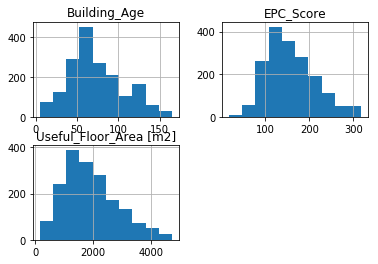

In [638]:
data_for_model_o_drop = data_for_model_o
data_for_model_o_drop = data_for_model_o_drop.drop(outlier_index,axis=0)
#data_for_model_o_drop.head()
data_for_model_o_drop.hist()

now we can standarlize the data after remove outlier,we try also two method for rescaling data 

In [639]:
#standarlizing the dataset without outlier
data_for_model_stand_drop = pd.DataFrame(preprocessing.scale(data_for_model_o_drop))
data_for_model_stand_drop.columns = data_for_model_o.columns  + '_stand_drop'
data_for_model_stand_drop.head()

,Building_Age_stand_drop,Useful_Floor_Area [m2]_stand_drop,EPC_Score_stand_drop
0,-0.191394,-0.675936,0.145873
1,-1.528957,-0.880563,-0.668936
2,-0.404188,-0.129762,-0.893338
3,-0.677781,-0.474487,-0.273888
4,-0.100196,2.165246,0.105466


In [640]:
#normalization the dataset without outlier
max_abs_scaler = preprocessing.MaxAbsScaler()
data_for_model_norm_drop = pd.DataFrame(max_abs_scaler.fit_transform(data_for_model_o_drop))
data_for_model_norm_drop.columns = data_for_model_o.columns  + '_norm_drop'
data_for_model_norm_drop.head()

,Building_Age_norm_drop,Useful_Floor_Area [m2]_norm_drop,EPC_Score_norm_drop
0,0.400000,0.270763,0.522178
1,0.133333,0.230519,0.379978
2,0.357576,0.378178,0.340815
3,0.303030,0.310381,0.448922
4,0.418182,0.829534,0.515127


In [678]:
corr = data_for_model_norm_drop.corr()
corr.style.background_gradient(cmap='coolwarm')

,Building_Age_norm_drop,Useful_Floor_Area [m2]_norm_drop,EPC_Score_norm_drop
Building_Age_norm_drop,1,-0.0511486,0.010836
Useful_Floor_Area [m2]_norm_drop,-0.0511486,1,-0.0484054
EPC_Score_norm_drop,0.010836,-0.0484054,1


#### data for the model

In [660]:
r = data_for_model_norm_drop

#### labeling the types

a example for adding labels of the features public_building_type in the category 'educational building'. i want to compare the result of before and after clustering. 
in the category 'educational building', it exist 6 types buildings. a assumption about perform of clustering. if it has a relationship with the original type, maybe it can prove something.  


In [661]:
#data_use_o.head()

In [662]:
# extrait the feature public_building_type.
#typeall = data_use_o.loc[data_use_o[f1]==value,['EPC_ID','Public_Building_Type']]
#typeall_drop = typeall.drop(outlier_index,axis=0)
#type_drop_edu = typeall_drop.groupby('Public_Building_Type').count()

In [663]:
#typeall_drop.head()
#type_drop_edu.index.values[0]

In [664]:
#a = np.empty((typeall_drop.shape[0]))
#for i in range(0,type_drop_edu.shape[0]):
#    soustype = type_drop_edu.index.values[i]
    #index = typeall_drop[typeall_drop.loc[:,'Public_Building_Type']==soustype]
#    index = np.where(typeall_drop.loc[:,'Public_Building_Type']==soustype)
#    a[index] = i

In [665]:
#fig = plt.figure()
#ax1 = Axes3D(fig)
#ax1.scatter(r.iloc[:,0],r.iloc[:,1],r.iloc[:,2],c=a,s=50,cmap='viridis')
#ax1.set_xlabel(r.columns[0])
#ax1.set_ylabel(r.columns[1])
#ax1.set_zlabel(r.columns[2])

#plt.show

### show all the distribution standard data 3D - 3index

<function matplotlib.pyplot.show(*args, **kw)>

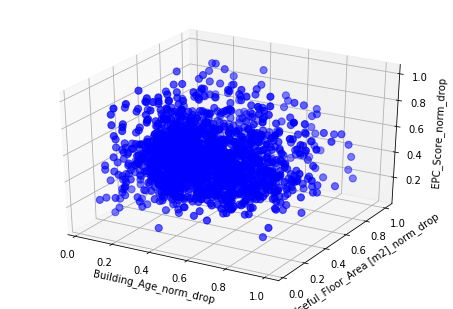

In [666]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r.iloc[:,0],r.iloc[:,1],r.iloc[:,2],s=50,c='b')
ax.set_xlabel(r.columns[0])
ax.set_ylabel(r.columns[1])
ax.set_zlabel(r.columns[2])
plt.show

## Model Kmean for data standard 

### an example for one kmeans: 3 class 

In [667]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

model_kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
label = model_kmean.fit(r)
model_kmean.cluster_centers_
model_kmean_predict1 = model_kmean.predict(r)
metrics.silhouette_score(r, label.labels_, metric='euclidean')

0.27859819648309414

the figure 3D -3 features

<function matplotlib.pyplot.show(*args, **kw)>

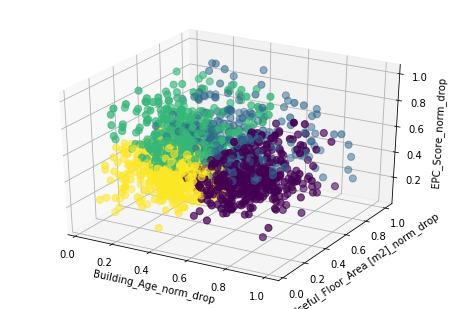

In [668]:
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.scatter(r.iloc[:,0],r.iloc[:,1],r.iloc[:,2],c=model_kmean_predict1,s=50,cmap='viridis')
ax1.set_xlabel(r.columns[0])
ax1.set_ylabel(r.columns[1])
ax1.set_zlabel(r.columns[2])
#ax1.view_init(20, 0) #view
plt.show

### apply the 1-9 class 

In [669]:
from scipy.spatial.distance import cdist

distortions = []
centroid = []
evolution = []

cla = range(2,10)

for i in cla:
    model_kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=i, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
    labels = model_kmean.fit(r)
    
    model_kmean_predict = model_kmean.predict(r)
    #centroids = model_kmean.cluster_centers_
    
    #Silhouette Coefficient¶
    evolution.append(metrics.silhouette_score(r, labels.labels_, metric='euclidean'))
    
    #centroid
    centroid.append(sum(model_kmean.cluster_centers_))
    
    #elbow
    distortions.append(sum(np.min(cdist(r, model_kmean.cluster_centers_, 'euclidean'), axis=1)) / r.shape[0])

### kmean's evolution 

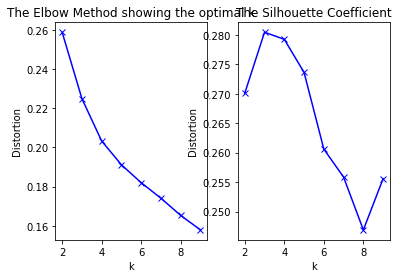

In [670]:
# Plot the elbow
plt.subplot(1,2,1)
plt.plot(cla, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
#plt.show()

# Plot the Silhouette Coefficient
plt.subplot(1,2,2)
plt.plot(cla, evolution, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette Coefficient')
plt.show()

## Model k medoids for data standard

In [671]:
r_ = list(r.values)

In [672]:
data_ = [
    [5.2, 3.7],[5.1,4.1], [5.2, 4.2], [5, 3.7], [5.3, 4], [5.5, 3.8], [5,4], [4.7, 3.7], [4.8, 4], [4.7, 3.3], [5.2, 3.3],[4.9,3.4], [5.3,3.5]
    ,[2.6, 1.5],[2.5, 1.2],[2.7, 1],[2.4,1.7],[2.6, 1.5],[2.7, 1.8], [2.1, 1.1], [2.2, 1.4], [2.3,0.8], [2.3, 1.3], [2.5,2]
    , [3, 3.5], [3.5, 3.8], [3.9, 3.2], [4.5, 1.9], [4.3, 1.4], [4, 2]
]
type(data_)#data_

list

In [673]:
from KMedoids import KMedoids
# split into 2 clusters
n_clusters = range(2,8)
k_medoids = [KMedoids(n_cluster=i) for i in n_clusters]
#k_medoids = [k_medoid.fit(r_) for k_medoid in k_medoids]
#loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]



In [674]:
k_medoids = [k_medoid.fit(r_) for k_medoid in k_medoids]
loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]

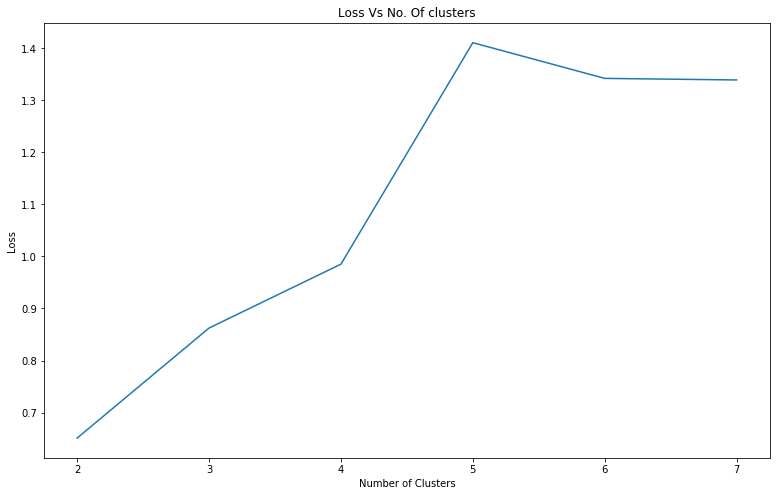

In [675]:
# Plot elbow curve (to know best cluster count)
plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss Vs No. Of clusters')
plt.show()

## Model PCA for data standard 

In [676]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(r)
principalComponents
#principalDf = pd.DataFrame(data = principalComponents）
             #,columns = ['principal component 1', 'principal component 2'])

array([[ 5.73719968e-02, -1.28390621e-01, -4.79994750e-04],
       [-1.39395629e-01, -3.08490852e-01, -1.48121664e-01],
       [-6.47684377e-02, -4.78103538e-02, -1.58020386e-01],
       ...,
       [-1.42202783e-01,  6.31507560e-01, -1.67089450e-02],
       [ 4.46157412e-01,  8.65741352e-02,  6.94873733e-02],
       [-2.89102062e-02, -1.00354933e-01, -1.23279263e-01]])

In [677]:
principalDf.head()
principalDf.describe()

NameError: name 'principalDf' is not defined

In [ ]:
plt.figure
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1])
plt.show()

In [ ]:
pca.explained_variance_ratio_

### show all the distribution standard data 2D - 2index

In [ ]:
# #### figure 2D -2 features
plt.figure
plt.scatter(r.iloc[:,0],r.iloc[:,1],c=model_kmean_predict1,s=50,cmap='viridis')
plt.xlabel(r.columns[0])
plt.ylabel(r.columns[1])
#plt.set_zlabel('EPC_Score_Standardized')
plt.show

In [ ]:
plt.figure()
plt.scatter(r.iloc[:,0],r.iloc[:,1],s=50,c='b')
plt.xlabel(r.columns[0])
plt.ylabel(r.columns[1])
#plt.set_zlabel('EPC_Score_Standardized')
plt.show